In [109]:
from bs4 import BeautifulSoup
import requests
import time
import datetime
# import smtplib
import os
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output

In [ ]:
URL = 'https://www.amazon.in/Seven-Rocks-T-Shirt-M-Cun-Wm_Wine-Melange_Medium/dp/B073FKXQ9H/ref=sr_1_34?crid=1C5P6Z2AF77Q0&dib=eyJ2IjoiMSJ9.zocPFUTRAFF-ESLNrkzVAPxNLZu5cZEq7s_S8fDZU0wTC6p0lB02SyZ2KCCcI4trbUwO6UDcDjxdlO-N8bZ_LYMFx48aK_0KwEci78oLEOC9E9Tu-rK_rrUuLdn-ttNbxvIt3KcxHRb1PcyTEtT9LjRFid6Z0okcprHi4PYrV2YFE1HAZZEvMqDsueK65VjuCe_YpDzX5rAvhLgmmARANqINoxiXD0EUhk91cgzUZPWZYzMzErwluGp7-haburQkYOln3Y2LtlohA95naSzSexBTadF4c2gE-Hi_V3CS95U.cYtQcs6hd3OJ2MmR6h6YN89uSXLJ10WDaC8WxrUheDA&dib_tag=se&keywords=got%2Bdata%2Btshirt&qid=1745296124&sprefix=got%2Bdata%2Btshirt%2Caps%2C222&sr=8-34&th=1&psc=1'

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

page = requests.get(URL , headers = headers)

soup1 = BeautifulSoup(page.content,"html.parser")
soup2 = BeautifulSoup(soup1.prettify(), "html.parser")
# print(soup2)



In [ ]:
# title = soup2.find_all(id='productTitle').get_text()
# price = soup2.find('span',class_ = 'a-price-whole')
# print(title)
# print(price)
title = soup2 .find('span',id="productTitle").getText().strip()
price = soup2 .find('span',class_="a-price-whole").getText().strip()
print(title);
print(price);

EYEBOGLER Solid Men's Shawl Collar Regular Fit T-Shirt
999


In [ ]:
# import datetime

today = datetime.date.today()
print(today)

2025-04-22


In [ ]:
import csv

header = ['Title', 'Price' , 'Date']
data = [title ,price , today]

with open('AmazonWebScraperDataset.csv','w',newline='',encoding='UTF8') as f:
  writer = csv.writer(f)
  writer.writerow(header)
#   writer.writerow(data)


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 [Text(-1.0, 0, '2025-04-28'),
  Text(0.0, 0, '2025-04-28'),
  Text(1.0, 0, '2025-04-28'),
  Text(2.0, 0, '2025-04-28'),
  Text(3.0, 0, '2025-04-28'),
  Text(4.0, 0, '2025-04-28'),
  Text(5.0, 0, '2025-04-28'),
  Text(6.0, 0, '2025-04-28'),
  Text(7.0, 0, '2025-04-28'),
  Text(8.0, 0, '2025-04-28'),
  Text(9.0, 0, '')])

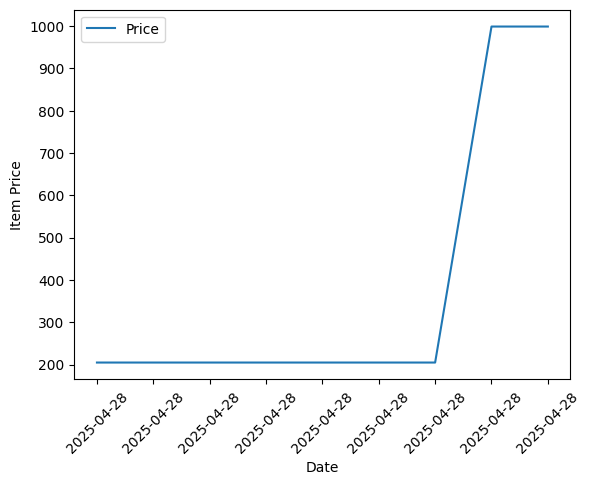

In [ ]:
import pandas as pd

df = pd.read_csv(r'/content/AmazonWebScraperDataset.csv')
# df
df1 = df[['Date','Price']]
df1.plot(x='Date',y='Price',ylabel='Item Price')
plt.xticks(rotation=45)

In [ ]:
with open('AmazonWebScraperDataset.csv','a+',newline='',encoding='UTF8') as f:
  writer = csv.writer(f)
  writer.writerow(data)

Combining everything into a function

In [113]:
def check_price():
  # item url
  URL = 'https://www.amazon.in/Focus-What-Matters-Darius-Foroux/dp/0143461842?ref=dlx_deals_dg_dcl_0143461842_dt_sl10_61_pi&pf_rd_r=PEKE3BKF69P081KKB3NJ&pf_rd_p=1ce42f93-7595-413b-b263-9a38e0c62f61'

  headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36",'Accept-Language' : 'en-US, en;q=0.5'}
            #  "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

  page = requests.get(URL
                      ,
                      headers = headers
                      )

  soup1 = BeautifulSoup(page.content,"html.parser")
  soup2 = BeautifulSoup(soup1.prettify(), "html.parser")

  title = soup2 .find(id='productTitle').getText().strip()
  price = soup2 .find(class_="a-price-whole").getText().split('.')[0].strip()

  today = datetime.date.today()

  import csv


  header = ['Title', 'Price' , 'Date']
  data = [title ,price , today]

  file_path = Path('/content/AmazonWebScraperDataset.csv')

  if  not os.path.exists(file_path) or not os.path.isfile(file_path):
    with open('AmazonWebScraperDataset.csv','w',newline='',encoding='UTF8') as f:
      writer = csv.writer(f)
      writer.writerow(header)
      # writer.writerow(data)
  # else:
  with open('AmazonWebScraperDataset.csv','a+',newline='',encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(data)

  clear_output(wait=True)
  df = pd.read_csv(r'/content/AmazonWebScraperDataset.csv')
  # df
  plt.clf()
  # plt.figure(figsize=(20, 4))
  df1 = df[['Date','Price']]
  df1.plot(x='Date',y='Price',ylabel='Item Price')
  plt.xticks(rotation=45)

  # plt.plot(x, y)
  plt.show()
# check_price()

<Figure size 640x480 with 0 Axes>

<Figure size 2000x400 with 0 Axes>

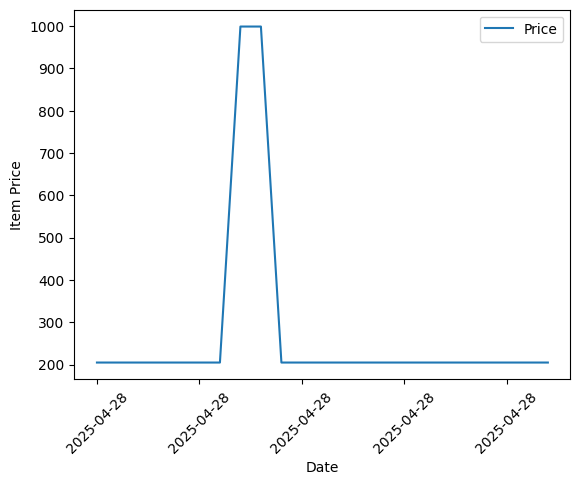

KeyboardInterrupt: 

In [112]:
while(True):
  check_price()

  time.sleep(86400)